# Chronos AI Wealth Management Agent


In [11]:
import os
from groq import Groq
import pandas as pd
import json
import openai
from datetime import datetime
from collections import defaultdict


mock_transactions = [
    {"date": "2025-05-01", "category": "Food", "amount": 180},
    {"date": "2025-05-03", "category": "Transport", "amount": 70},
    {"date": "2025-05-04", "category": "Rent", "amount": 500},
    {"date": "2025-05-10", "category": "Entertainment", "amount": 60},
    {"date": "2025-05-15", "category": "Utilities", "amount": 100},
    {"date": "2025-05-20", "category": "Food", "amount": 150},
    {"date": "2025-05-23", "category": "Subscriptions", "amount": 40},
    {"date": "2025-05-26", "category": "Transport", "amount": 60},
]

### ------------------------
### 1. Personalized Financial Analysis
### ------------------------

def analyze_transactions(transactions):
    category_totals = defaultdict(float)
    for tx in transactions:
        category_totals[tx["category"]] += tx["amount"]
    
    sorted_categories = sorted(category_totals.items(), key=lambda x: x[1], reverse=True)
    return {
        "summary": category_totals,
        "sorted": sorted_categories,
        "ready_for_visualization": [{"category": k, "amount": v} for k, v in sorted_categories]
    }



### ------------------------
### 2. Smart Budgeting & Saving Suggestions
### ------------------------


def generate_budget_prompt(analysis_result):
    spending_summary = json.dumps(analysis_result["summary"])
    prompt = f"""
You are a financial assistant. Here is the user's spending data (monthly):
{spending_summary}

Based on this, suggest:
1. A monthly budget for each category
2. One saving goal
3. Tips to stick to the budget
"""
    return prompt


# def get_budget_recommendation(prompt):
#     client = openai.OpenAI(api_key=openai.api_key)
#     response = client.chat.completions.create(
#         model="gpt-4",
#         messages=[
#             {"role": "user", "content": prompt}
#         ]
#     )
#     return response.choices[0].message.content

GROQ_API_KEY = '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'
# groq_api_key = os.getenv("GROQ_API_KEY")
groq_api_key = GROQ_API_KEY

client = Groq(api_key=groq_api_key)

def get_budget_recommendation(transactions_summary):
    prompt = f"""
    Based on the following transaction summary, generate a personalized budget plan
    for the upcoming month. Include savings, flexible spending, and essential categories.
    
    Transaction Summary: {transactions_summary}
    
    Response format:
    - Monthly Budget Overview
    - Key Areas of Overspending
    - Savings Tips
    """

    response = client.chat.completions.create(
        # - llama3-70b-8192
        # - llama3-8b-8192
        # - gemma-7b-it

        model="llama3-70b-8192",
        messages=[
            {"role": "system", "content": "You are a financial budgeting assistant."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.7
    )

    return response.choices[0].message.content.strip()

### ------------------------
### 3. Investment Guidance
### ------------------------

def generate_investment_prompt(user_profile):
    prompt = f"""
You are a robo-investor advisor. Here is the user's profile:
- Age: {user_profile['age']}
- Risk Appetite: {user_profile['risk_appetite']}
- Goal: {user_profile['goal']}
- Monthly Investment Capacity: ${user_profile['monthly_investment']}

Recommend a diversified ETF or stock portfolio.
Explain why each asset is chosen.
"""
    return prompt

# def get_investment_advice(prompt):
#     response = openai.ChatCompletion.create(
#         model="gpt-4",
#         messages=[
#             {"role": "user", "content": prompt}
#         ]
#     )
#     return response["choices"][0]["message"]["content"]

def get_investment_advice(prompt):
    response = client.chat.completions.create(
        model="llama3-70b-8192",
        messages=[
            {"role": "system", "content": "You are a robo-investor advisor."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.7
    )
    return response.choices[0].message.content.strip()



In [15]:
if __name__ == '__main__':
    print("--- Financial Analysis ---")
    analysis_result = analyze_transactions(mock_transactions)
    print(json.dumps(analysis_result["ready_for_visualization"], indent=2))

    print("\n--- Budget & Saving Suggestion ---")
    budget_prompt = generate_budget_prompt(analysis_result)
    # budget_response = get_budget_recommendation(budget_prompt)
    # print(budget_response)

    print("\n--- Investment Advice ---")
    user_profile = {
        "age": 30,
        "risk_appetite": "Moderate",
        "goal": "Retirement savings",
        "monthly_investment": 300
    }
    investment_prompt = generate_investment_prompt(user_profile)
    # investment_response = get_investment_advice(investment_prompt)
    # print(investment_response)


--- Financial Analysis ---
[
  {
    "category": "Rent",
    "amount": 500.0
  },
  {
    "category": "Food",
    "amount": 330.0
  },
  {
    "category": "Transport",
    "amount": 130.0
  },
  {
    "category": "Utilities",
    "amount": 100.0
  },
  {
    "category": "Entertainment",
    "amount": 60.0
  },
  {
    "category": "Subscriptions",
    "amount": 40.0
  }
]

--- Budget & Saving Suggestion ---

--- Investment Advice ---


## moke dataset

In [1]:
import pandas as pd

moke_data = pd.read_csv("../data/Comprehensive_Banking_Database.csv")
moke_data

,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,...,Minimum Payment Due,Payment Due Date,Last Credit Card Payment Date,Rewards Points,Feedback ID,Feedback Date,Feedback Type,Resolution Status,Resolution Date,Anomaly
0,1,Joshua,Hall,45,Male,Address_1,Fort Worth,19458794854,joshua.hall@kag.com,Current,...,226.22,11/26/2023,3/20/2023,8142,1,10/6/2023,Suggestion,Resolved,1/22/2023,1
1,2,Mark,Taylor,47,Female,Address_2,Louisville,19458794855,mark.taylor@kag.com,Current,...,42.84,11/5/2023,6/16/2023,4306,2,4/7/2023,Complaint,Resolved,8/27/2023,1
2,3,Joseph,Flores,25,Female,Address_3,Philadelphia,19458794856,joseph.flores@kag.com,Current,...,162.12,1/8/2023,3/20/2023,4842,3,9/7/2023,Praise,Pending,5/11/2023,1
3,4,Kevin,Lee,52,Other,Address_4,Oklahoma City,19458794857,kevin.lee@kag.com,Savings,...,216.46,9/8/2023,10/15/2023,9463,4,5/28/2023,Complaint,Resolved,7/5/2023,1
4,5,Linda,Johnson,68,Other,Address_5,Phoenix,19458794858,linda.johnson@kag.com,Savings,...,1.29,3/4/2023,7/27/2023,2209,5,2/12/2023,Complaint,Resolved,11/21/2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Emily,Sanchez,21,Other,Address_4996,Mesa,19458799849,emily.sanchez@kag.com,Savings,...,100.86,7/19/2023,2/10/2023,7530,4996,4/12/2023,Complaint,Pending,1/23/2023,1
4996,4997,Melissa,Perez,27,Female,Address_4997,Los Angeles,19458799850,melissa.perez@kag.com,Savings,...,42.67,2/16/2023,12/24/2023,8796,4997,9/7/2023,Complaint,Pending,9/17/2023,1
4997,4998,Timothy,Walker,45,Female,Address_4998,Louisville,19458799851,timothy.walker@kag.com,Current,...,11.42,2/23/2023,9/6/2023,9966,4998,10/23/2023,Suggestion,Resolved,2/5/2023,1
4998,4999,Deborah,Nelson,58,Female,Address_4999,Detroit,19458799852,deborah.nelson@kag.com,Current,...,16.27,9/8/2023,1/12/2023,538,4999,5/20/2023,Complaint,Pending,3/3/2023,1


In [64]:
user_data = moke_data[moke_data['Customer ID'] == 3]
user_data


,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,...,Minimum Payment Due,Payment Due Date,Last Credit Card Payment Date,Rewards Points,Feedback ID,Feedback Date,Feedback Type,Resolution Status,Resolution Date,Anomaly
2,3,Joseph,Flores,25,Female,Address_3,Philadelphia,19458794856,joseph.flores@kag.com,Current,...,162.12,1/8/2023,3/20/2023,4842,3,9/7/2023,Praise,Pending,5/11/2023,1


### create a mock dataset

In [ ]:
from faker import Faker
import pandas as pd
import random

fake = Faker()
transactions = []

for _ in range(1000):
    amount = round(random.uniform(-500, 2000), 2)
    transactions.append({
        "Date": fake.date_between(start_date='-1y', end_date='today'),
        "Description": fake.company(),
        "Amount": amount,
        "Type": "Credit" if amount > 0 else "Debit",
        "Balance": 0  # You can calculate this as a running total
    })

df = pd.DataFrame(transactions).sort_values("Date")
df["Balance"] = df["Amount"].cumsum()


In [2]:
un = moke_data.nunique()
un

Customer ID                          5000
First Name                             50
Last Name                              50
Age                                    52
Gender                                  3
Address                              5000
City                                   40
Contact Number                       5000
Email                                2139
Account Type                            2
Account Balance                      4991
Date Of Account Opening              3738
Last Transaction Date                 365
TransactionID                        5000
Transaction Date                      365
Transaction Type                        3
Transaction Amount                   4972
Account Balance After Transaction    4984
Branch ID                              99
Loan ID                              5000
Loan Amount                          5000
Loan Type                               3
Interest Rate                         900
Loan Term                         

## users financial behavior analyser

In [ ]:
import pandas as pd

def analyze_user_financial_behavior(df: pd.DataFrame, customer_id: str):
    # Filter data for this customer
    user_data = df[df['Customer ID'] == customer_id]

    # To fix this, add a check for empty user_data before accessing .iloc[0]:
    if user_data.empty:
        return {
            'profile_summary': {},
            'monthly_activity': {},
            'credit_utilization': None,
            'loan_burden': None,
            'error': f"No data found for Customer ID {customer_id}"
        }

    # Basic profile
    profile = {
        'Age': user_data['Age'].iloc[0],
        'City': user_data['City'].iloc[0],
        'Account Type': user_data['Account Type'].iloc[0],
        'Account Balance': user_data['Account Balance'].iloc[0],
        'Credit Card Balance': user_data['Credit Card Balance'].mean(),
        'Loan Status': user_data['Loan Status'].mode()[0] if not user_data['Loan Status'].isna().all() else "No Loan"
    }


    # Monthly transaction pattern
    user_data['Transaction Date'] = pd.to_datetime(user_data['Transaction Date'])
    monthly_summary = user_data.groupby(user_data['Transaction Date'].dt.to_period('M')).agg({
        'Transaction Amount': ['sum', 'count'],
        'Transaction Type': lambda x: x.value_counts().idxmax()
    })

    # Credit card utilization
    utilization = None
    if 'Credit Limit' in user_data.columns and user_data['Credit Limit'].mean() > 0:
        utilization = user_data['Credit Card Balance'].mean() / user_data['Credit Limit'].mean()

    # Loan burden
    loan_burden = None
    if not user_data['Loan Amount'].isna().all():
        loan_burden = user_data['Loan Amount'].sum() / user_data['Account Balance'].iloc[0]

    return {
        'profile_summary': profile,
        'monthly_activity': monthly_summary.to_dict(),
        'credit_utilization': utilization,
        'loan_burden': loan_burden
    }


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_user_financial_behavior(df: pd.DataFrame, customer_id: str):
    # Filter data for this customer
    user_data = df[df['Customer ID'] == customer_id]

    # To fix this, add a check for empty user_data before accessing .iloc[0]:
    if user_data.empty:
        return {
            'profile_summary': {},
            'monthly_activity': {},
            'credit_utilization': None,
            'loan_burden': None,
            'error': f"No data found for Customer ID {customer_id}"
        }

    # Basic profile
    profile = {
        'Age': user_data['Age'].iloc[0],
        'City': user_data['City'].iloc[0],
        'Account Type': user_data['Account Type'].iloc[0],
        'Account Balance': user_data['Account Balance'].iloc[0],
        'Credit Card Balance': user_data['Credit Card Balance'].mean(),
        'Loan Status': user_data['Loan Status'].mode()[0] if not user_data['Loan Status'].isna().all() else "No Loan"
    }

    # Monthly transaction pattern
    user_data['Transaction Date'] = pd.to_datetime(user_data['Transaction Date'])
    monthly_summary = user_data.groupby(user_data['Transaction Date'].dt.to_period('M')).agg({
        'Transaction Amount': ['sum', 'count'],
        'Transaction Type': lambda x: x.value_counts().idxmax()
    })

    # Credit card utilization
    utilization = None
    if 'Credit Limit' in user_data.columns and user_data['Credit Limit'].mean() > 0:
        utilization = user_data['Credit Card Balance'].mean() / user_data['Credit Limit'].mean()

    # Loan burden
    loan_burden = None
    if not user_data['Loan Amount'].isna().all():
        loan_burden = user_data['Loan Amount'].sum() / user_data['Account Balance'].iloc[0]

    # Return the DataFrame directly for easier plotting
    return {
        'profile_summary': profile,
        'monthly_activity': monthly_summary,
        'credit_utilization': utilization,
        'loan_burden': loan_burden
    }


In [68]:
# Example usage:
moke_data = pd.read_csv("../data/Comprehensive_Banking_Database.csv")
customer_id = 488
result = analyze_user_financial_behavior(moke_data, customer_id)
print("--- Users Financial Behavior Analysis ---")
print(result)

--- Users Financial Behavior Analysis ---
{'profile_summary': {'Age': np.int64(45), 'City': 'San Diego', 'Account Type': 'Current', 'Account Balance': np.float64(4062.15), 'Credit Card Balance': np.float64(4174.37), 'Loan Status': 'Approved'}, 'monthly_activity':                  Transaction Amount       Transaction Type
                                sum count         <lambda>
Transaction Date                                          
2023-05                      212.86     1       Withdrawal, 'credit_utilization': np.float64(0.4350246099559074), 'loan_burden': np.float64(11.5689573255542)}


C:\Users\Hp\AppData\Local\Temp\ipykernel_1940\1270723632.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['Transaction Date'] = pd.to_datetime(user_data['Transaction Date'])


In [69]:

# --- Plotting Section ---
def plot_monthly_activity(result):
    monthly_activity = result['monthly_activity']
    if monthly_activity is None:
        print("No monthly activity data to plot.")
        return

    # Flatten columns if MultiIndex
    if isinstance(monthly_activity.columns, pd.MultiIndex):
        monthly_activity.columns = ['_'.join([str(i) for i in col]).strip('_') for col in monthly_activity.columns]

    monthly_activity = monthly_activity.reset_index()
    monthly_activity['Month'] = monthly_activity['Transaction Date']

    plt.figure(figsize=(12, 5))

    # Spending over time
    plt.subplot(1, 2, 1)
    plt.plot(monthly_activity['Month'].astype(str), monthly_activity['Transaction Amount_sum'], marker='o')
    plt.title('Monthly Spending')
    plt.xlabel('Month')
    plt.ylabel('Total Transaction Amount')
    plt.xticks(rotation=45)

    # Transaction count over time
    plt.subplot(1, 2, 2)
    plt.plot(monthly_activity['Month'].astype(str), monthly_activity['Transaction Amount_count'], marker='x', color='orange')
    plt.title('Monthly Transaction Count')
    plt.xlabel('Month')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()



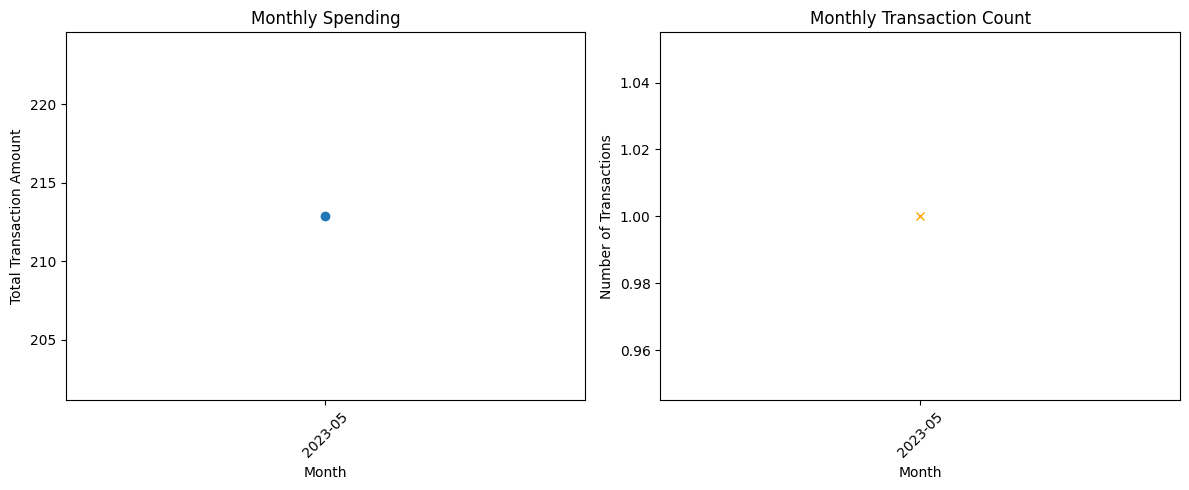

In [ ]:
plot_monthly_activity(result)

## local embedding model loading

In [3]:
import os
from sentence_transformers import SentenceTransformer, util
import faiss
import numpy as np
import logging

# Load the embedding model
model_path = os.path.abspath("../../hf_models/all-MiniLM-L6-v2")
print("Model path:", model_path)
print("Exists:", os.path.exists(model_path))
try:
    embedding_model = SentenceTransformer(model_path)
except Exception as e:
    logging.error(f"Error loading embedding model: {e}")
    raise ValueError("Failed to load the embedding model.")

Model path: c:\Users\temesgen.gebreabzgi\Downloads\repos\ch\hf_models\all-MiniLM-L6-v2
Exists: True


In [12]:
import ollama
import requests
import re

def remove_thinking(text):
    # This regex removes everything between <think> and </think> including the tags themselves
    cleaned_text = re.sub(r'<think>.*?</think>', '', text, flags=re.DOTALL).strip()
    return cleaned_text

# response = requests.post(
#     "http://localhost:11434/api/generate",
#     json={"model": "mistral", "prompt": "What is the capital of France?"}
# )

# print(response.json()['response'])

# Initialize the Ollama client
client = ollama.Client()

# Define the model and the input prompt
model = "deepseek-r1"  # Replace with your model name
prompt = (
    "Please answer the following directly, without showing your thought process: "
    "what are the promising AI + fintech/ banking startups or companies currently?"
)


# Send the query to the model
response = client.generate(model=model, prompt=prompt)

# Print the response from the model
print("Response from Ollama:")
print(response)



Response from Ollama:
model='deepseek-r1' created_at='2025-06-18T11:20:50.3985624Z' done=True done_reason='stop' total_duration=338679518500 load_duration=21705182900 prompt_eval_count=29 prompt_eval_duration=11564976900 eval_count=755 eval_duration=305358706600 response='<think>\nOkay, user is asking about promising AI + fintech/banking startups or companies. They specifically want a direct answer without seeing their thought process - which means they probably just need concise, actionable info rather than analysis.\n\nHmm, this seems like someone looking for investment opportunities or industry insights. Maybe an investor scanning trends, or a professional considering career moves in fintech? The phrasing suggests urgency too - "currently" implies they want near-term prospects, not historical ones.\n\nLet me think about the key areas... Should cover both startups and established players since user didn\'t specify. Need to balance breadth (different applications) with depth (not just

## budget advisory agent

In [ ]:
### ------------------------
### 2. Smart Budgeting & Saving Suggestions
### ------------------------
groq_api_key = os.getenv("GROQ_API_KEY")

client = Groq(api_key=groq_api_key)

#expects input parameter analysis_result transaction summary

def get_budget_recommendation(transactions_summary):
    prompt = f"""
    You are an AI financial assistant tasked with helping users manage their finances.

    User's summarized transaction data for the last few months is provided below.

    Use this data to generate a personalized budget plan for the upcoming month. 

    Ensure your response:
    1. Follows the 50/30/20 or custom rule based on user's spending behavior.
    2. Identifies major overspending areas.
    3. Suggests one to three clear savings strategies.
    4. Highlights any recurring costs that can be optimized or canceled.

    === Transaction Summary ===
    {json.dumps(transactions_summary, indent=2)}

    Respond in this format:
    ---
    Monthly Budget Overview:
    - Total Income: 
    - Essentials (e.g. rent, groceries, utilities):
    - Flexible Spending (e.g. dining, entertainment):
    - Savings Target:
    - Suggested Budget Plan:

    Key Areas of Overspending:
    - [List overspent categories and explain]

    Savings Tips:
    - [3 bullet points with actionable suggestions]
    ---
    """

    #using ollama
    client = ollama.Client()
    # Use the existing Ollama client and deepseek model
    response = client.generate(
        model=model,
        prompt=prompt
    )

    # Ollama's .generate() returns a response object with a 'response' attribute
    return response.response.strip()
